<a href="https://colab.research.google.com/github/khodjasCode/for_mohirdev/blob/main/05_ml_09_scikit_SimpleLinearRegression_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Amaliyot. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [4]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
correlations = df.corr()

In [8]:
correlations

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Наибольшая корреляция с `Sales`: TV (коэффициент корреляции: 0.9012079133023315)


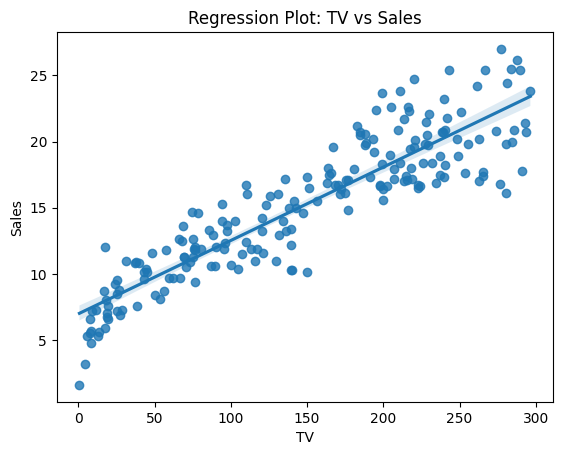

In [13]:
sales_correlation = correlations['Sales'].drop('Sales')
max_corr_column = sales_correlation.idxmax()
max_corr_value = sales_correlation.max()

print(f"Наибольшая корреляция с `Sales`: {max_corr_column} (коэффициент корреляции: {max_corr_value})")

sns.regplot(data = df, x=max_corr_column, y='Sales')
plt.title(f"Regression Plot: {max_corr_column} vs Sales")
plt.show()

In [14]:
sales_correlation

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960


In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [19]:
x_train = np.asanyarray(train_set['TV']).reshape(-1, 1)
y_train = np.asanyarray(train_set['Sales'])

LR_model.fit(x_train, y_train)

LinearRegression()

In [20]:
theta_1 = LR_model.coef_[0]
theta_0 = LR_model.intercept_

print(f"θ1 (Slope): {theta_1}")
print(f"θ0 (Intercept): {theta_0}")

θ1 (Slope): 0.05513263076693964
θ0 (Intercept): 7.044916461655207


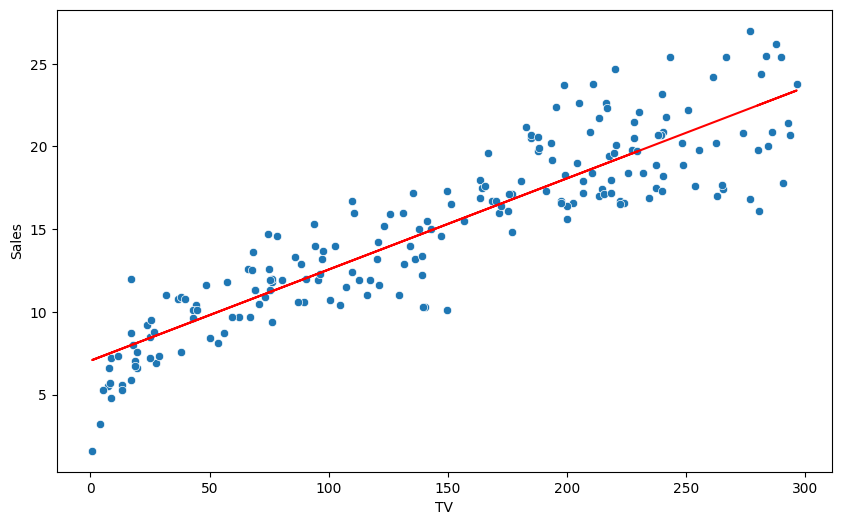

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta_0 + theta_1 * x_train, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [22]:
x_test = np.asanyarray(test_set['TV']).reshape(-1, 1)
y_test = np.asanyarray(test_set['Sales'])

y_predict = LR_model.predict(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_predict)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.037955356968121
Root Mean Squared Error (RMSE): 2.5103822386472214


In [26]:
LR_model.predict(np.array([[100]]))

array([12.55817954])